**Dataset**

**Dataset Description:**
In this IRB-approved study, 22 technologists were trained in pancreas segmentation on portal venous phase CT through radiologist-led interactive videoconferencing sessions based on an image-rich curriculum. Technologists segmented pancreas in 188 CTs using freehand tools on custom image-viewing software. Subsequent supplementary training included multimedia videos focused on common errors, which were followed by second batch of 159 segmentations. Two radiologists reviewed all cases and corrected inaccurate segmentations. Technologists’ segmentations were compared against radiologists’ segmentations using Dice-Sorenson coefficient (DSC), Jaccard coefficient (JC), and Bland–Altman analysis.

**Key Information:**

The attributes of the dataset were derived from measuring seven geometric features of wheat kernels:

**Total_Red_Mean+STD:**
This represents the sum of the average and standard deviation of the red color channel in the image.

**Total_Green_Mean:** This is the mean value of the green color channel in the image.

**Total_Green_STD:** This represents the standard deviation of the green color channel in the image.

**Total_Green_Mean-STD:** This attribute is calculated by subtracting the standard deviation from the mean of the green color channel.

**Total_Green_Mean+STD:** This attribute is calculated by adding the standard deviation to the mean of the green color channel.

**Total_Blue_Mean:** This is the average value of the blue color channel in the image.

**Total_Blue_STD:** This represents the standard deviation of the blue color channel in the image.

**Categories:** This represents the level for desease (good or bad) situation.

https://www.cancerimagingarchive.net/collection/pancreas-ct/

In [3]:

!pip3 install pycaret
!pip3 install pca
!pip3 install shap
!pip install shap pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 k

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pca import pca
import shap
from pycaret.utils import version
from pycaret.classification import *
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from pycaret.classification import *

In [5]:
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

**Read the dataset**

**pd.read_csv** is a function in the pandas library in Python that is used to read a CSV (Comma Separated Values) file and convert it into a pandas DataFrame.

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/kermanimohammad/Project6220_Advanced-Statistical-Approaches-to-Quality/main/MainProjectDataset/Dataset.csv')#
df.head(1000)

,Total_Red_Mean+STD,Total_Green_Mean,Total_Green_STD,Total_Green_Mean-STD,Total_Green_Mean+STD,Total_Blue_Mean,Total_Blue_STD,Categories
0,176.760682,104.439512,69.221539,35.217973,173.661051,119.734023,70.784745,0
1,170.668853,97.587597,73.602989,23.984608,171.190585,112.008341,70.694074,1
2,167.004484,82.754999,82.002732,0.752267,164.757731,134.380786,77.045218,1
3,158.103255,97.381919,66.344187,31.037732,163.726105,140.680630,67.994095,1
4,151.253381,79.007231,76.863248,2.143982,155.870479,106.783861,84.745262,1
...,...,...,...,...,...,...,...,...
183,157.935293,77.998038,79.674624,-1.676586,157.672662,90.327807,82.605090,0
184,190.914689,115.299722,74.092482,41.207240,189.392204,132.785334,74.288781,1
185,138.227671,68.797049,67.866349,0.930700,136.663398,90.909764,71.954048,1
186,138.851861,71.877373,65.451762,6.425610,137.329135,111.654184,69.707947,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total_Red_Mean+STD    188 non-null    float64
 1   Total_Green_Mean      188 non-null    float64
 2   Total_Green_STD       188 non-null    float64
 3   Total_Green_Mean-STD  188 non-null    float64
 4   Total_Green_Mean+STD  188 non-null    float64
 5   Total_Blue_Mean       188 non-null    float64
 6   Total_Blue_STD        188 non-null    float64
 7   Categories            188 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 11.9 KB


**Data Analysis**

**sns.pairplot** is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

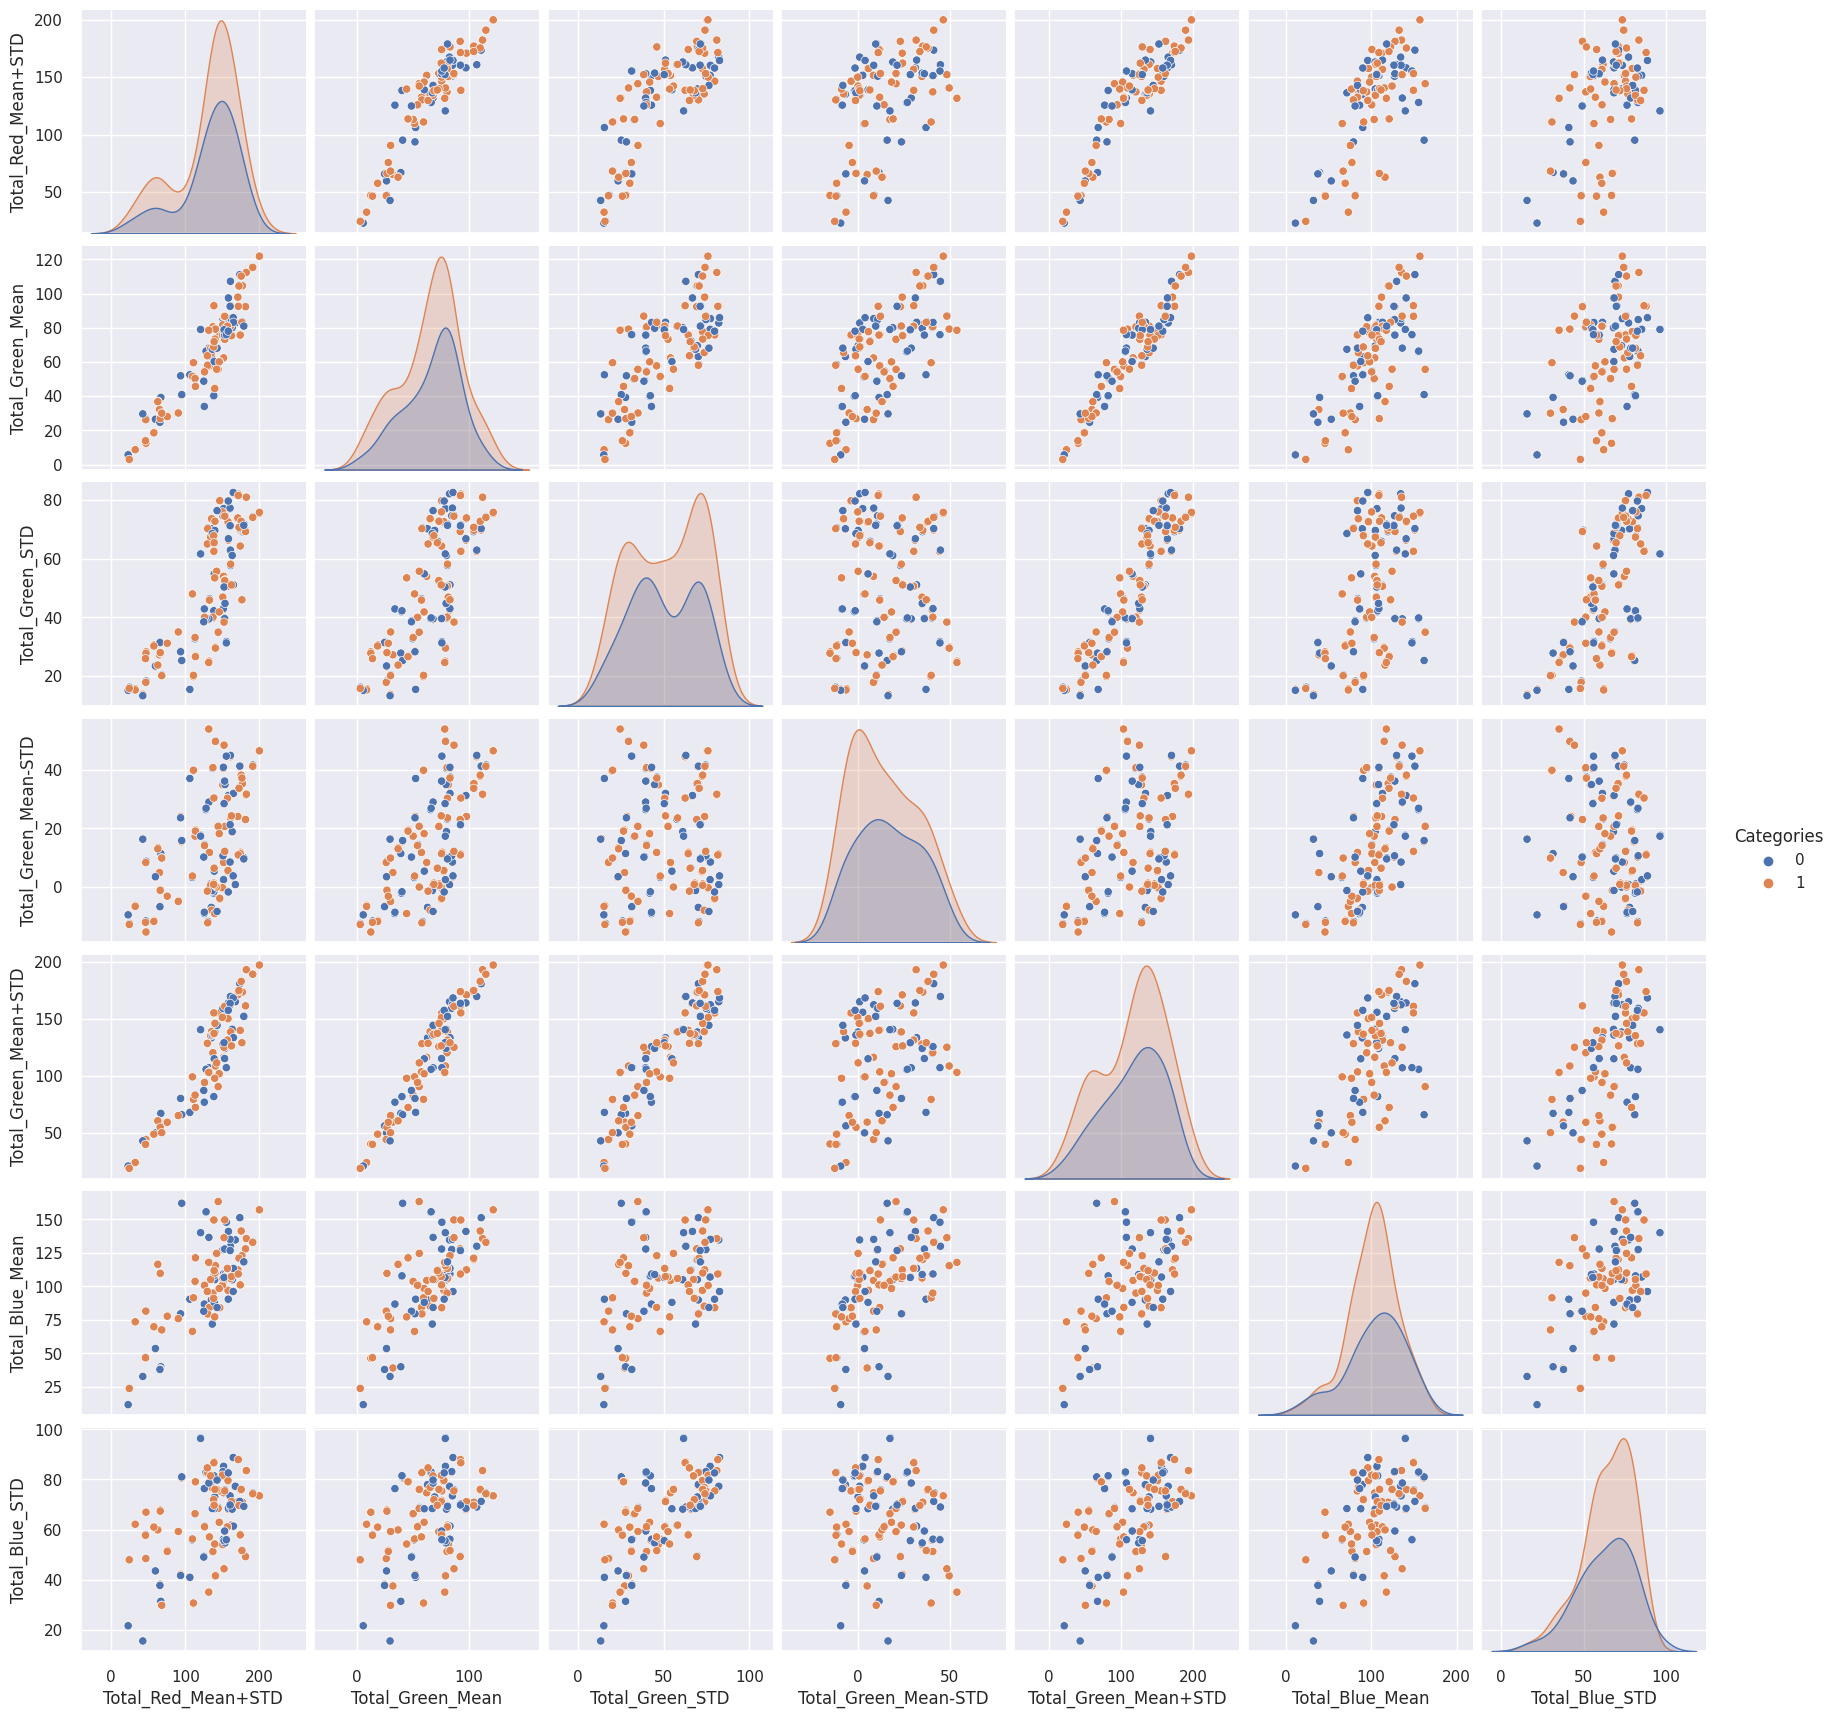

In [9]:
sns.pairplot(df, hue='Categories')
plt.show()

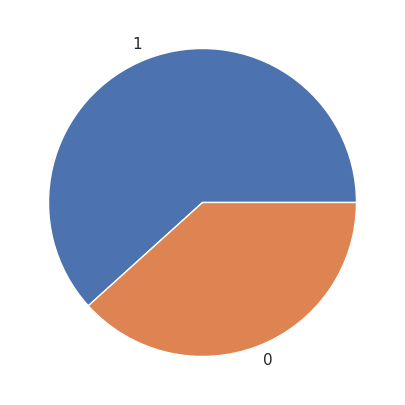

In [11]:
y =df['Categories']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [12]:
X = df.drop(columns=['Categories'])
X.head(10)

,Total_Red_Mean+STD,Total_Green_Mean,Total_Green_STD,Total_Green_Mean-STD,Total_Green_Mean+STD,Total_Blue_Mean,Total_Blue_STD
0,176.760682,104.439512,69.221539,35.217973,173.661051,119.734023,70.784745
1,170.668853,97.587597,73.602989,23.984608,171.190585,112.008341,70.694074
2,167.004484,82.754999,82.002732,0.752267,164.757731,134.380786,77.045218
3,158.103255,97.381919,66.344187,31.037732,163.726105,140.680630,67.994095
4,151.253381,79.007231,76.863248,2.143982,155.870479,106.783861,84.745262
5,199.569888,121.829227,75.389525,46.439702,197.218752,157.078805,73.382721
6,146.419646,75.462312,79.615041,-4.152729,155.077353,83.723865,75.268493
7,134.729672,63.013387,69.992844,-6.979457,133.006231,89.476027,77.592206
8,160.715846,106.958296,62.502624,44.455671,169.460920,129.577430,68.972533
9,181.882993,112.282254,80.878778,31.403476,193.161032,135.345770,83.432819


In [13]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total_Red_Mean+STD,188.0,131.620100,40.953367,22.931591,118.954313,140.337757,158.013919,199.90631
Total_Green_Mean,188.0,66.198360,26.643284,3.018454,50.237834,73.305327,81.962846,121.87359
Total_Green_STD,188.0,51.130387,20.308008,13.311455,31.773367,50.938773,70.235520,82.60074
Total_Green_Mean-STD,188.0,15.214173,17.865987,-15.341175,0.004220,12.238156,30.388219,53.99335
Total_Green_Mean+STD,188.0,117.204923,43.892340,18.806855,82.489995,126.297124,151.684563,197.43472
Total_Blue_Mean,188.0,103.376681,31.144034,11.541144,84.423650,106.834269,124.626761,163.40229
Total_Blue_STD,188.0,64.390966,15.935271,15.666567,55.734075,68.081923,76.299414,96.62931


**Standardize the Data**

In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Total_Red_Mean+STD,Total_Green_Mean,Total_Green_STD,Total_Green_Mean-STD,Total_Green_Mean+STD,Total_Blue_Mean,Total_Blue_STD
0,1.105187,1.439134,0.893217,1.122648,1.289676,0.526618,0.402306
1,0.956039,1.181275,1.109543,0.492212,1.233241,0.277893,0.396601
2,0.866324,0.623078,1.524265,-0.811627,1.086289,0.998165,0.796224
3,0.648393,1.173535,0.751153,0.888046,1.062723,1.200986,0.226714
4,0.480686,0.482038,1.270512,-0.733522,0.883270,0.109693,1.280722
5,1.663630,2.093564,1.197750,1.752431,1.827824,1.728919,0.565774
6,0.362341,0.348632,1.406377,-1.086904,0.865152,-0.632715,0.684430
7,0.076132,-0.119860,0.931299,-1.245545,0.360963,-0.447526,0.830641
8,0.712358,1.533924,0.561483,1.641084,1.193728,0.843523,0.288279
9,1.230597,1.734281,1.468772,0.908572,1.735130,1.029233,1.198141


In [15]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total_Red_Mean+STD,188.0,-3.070830e-16,1.00267,-2.661045,-0.310099,0.213436,0.646206,1.671866
Total_Green_Mean,188.0,1.275575e-16,1.00267,-2.377658,-0.600645,0.267457,0.593267,2.095233
Total_Green_STD,188.0,1.370062e-16,1.00267,-1.867240,-0.955717,-0.009461,0.943280,1.553790
Total_Green_Mean-STD,188.0,-5.669224e-17,1.00267,-1.714819,-0.853609,-0.167019,0.851594,2.176355
Total_Green_Mean+STD,188.0,-2.078715e-16,1.00267,-2.247791,-0.793023,0.207701,0.787648,1.832758
Total_Blue_Mean,188.0,-2.881856e-16,1.00267,-2.956610,-0.610186,0.111316,0.684138,1.932501
Total_Blue_STD,188.0,4.334594e-16,1.00267,-3.065809,-0.544704,0.232240,0.749297,2.028483


**Observations and variables**

In [16]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

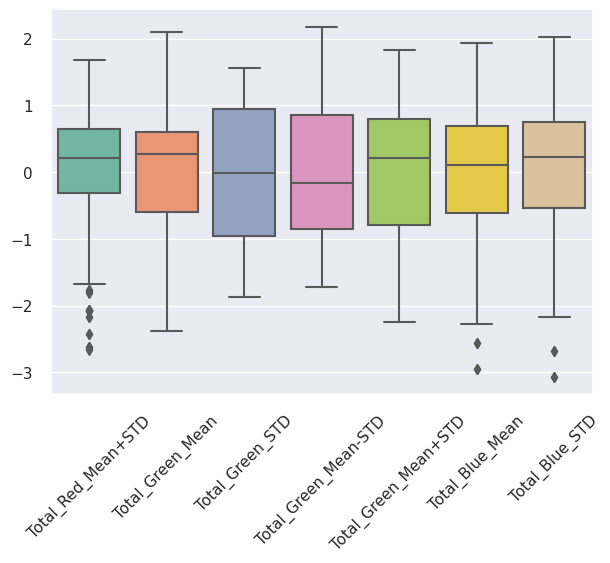

In [18]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

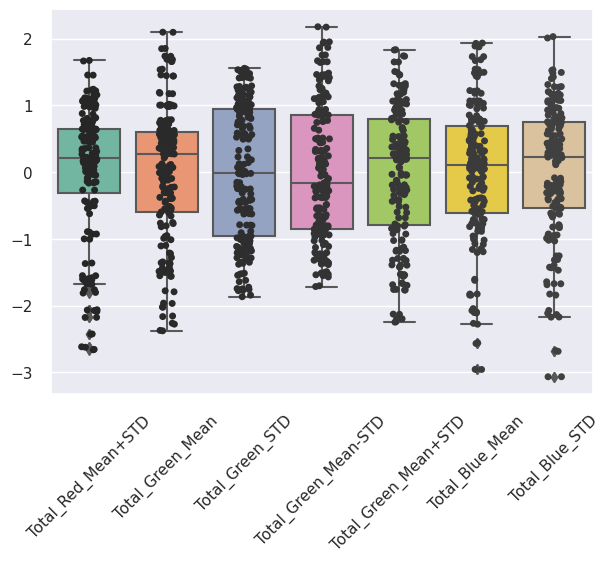

In [19]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

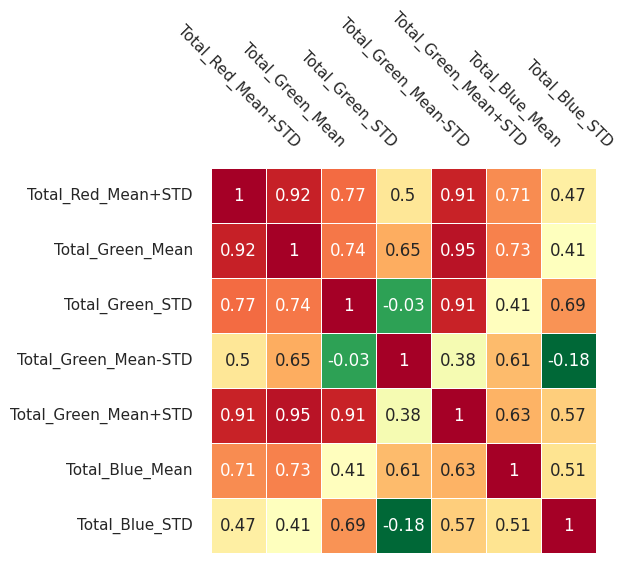

In [20]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=-45);

## **Principal Component Analysis**

Principal Component Analysis (PCA) is a popular method in data analysis and machine learning that serves to decrease the dimensionality of large datasets. The core principle of PCA involves converting a group of highly dimensional variables into a smaller set of uncorrelated variables known as principal components. This transformation aims to preserve as much of the original dataset's variance as possible, ensuring that significant patterns and structures are not lost in the process.

##**Applying PCA**

Text(0, 0.5, '$Z_2$')

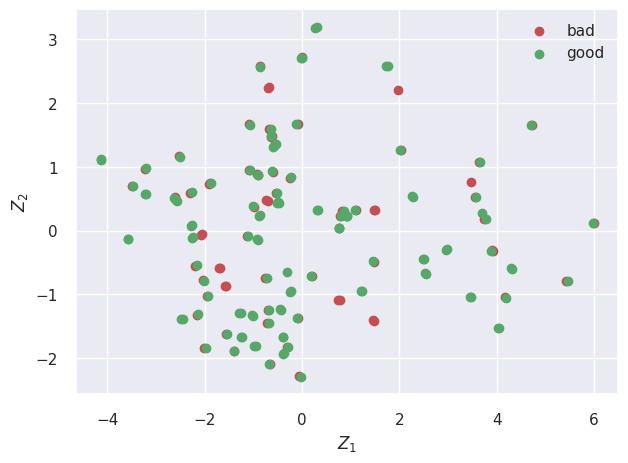

In [21]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='bad')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='good')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

[[-4.37441272e-01  5.77606427e-02 -1.71012061e-01  6.04472284e-01
  -6.40834934e-01  2.50819489e-03 -1.12726237e-03]
 [-4.43417656e-01  1.63944780e-01 -2.07693784e-01 -2.80947782e-01
   1.05032242e-01 -4.19789600e-01  6.83505265e-01]
 [-3.82533586e-01 -4.02165359e-01 -3.21611239e-01  5.80980478e-03
   3.18643711e-01  6.86412457e-01  1.25569346e-01]
 [-2.26363303e-01  7.01714879e-01  5.57322531e-02 -4.32703784e-01
  -2.03225545e-01  4.40935335e-01 -1.74047818e-01]
 [-4.46273482e-01 -8.68036037e-02 -2.74642647e-01 -1.67014741e-01
   2.12230844e-01 -3.97720794e-01 -6.97681048e-01]
 [-3.66602232e-01  2.20140943e-01  6.47765656e-01  4.07230416e-01
   4.81354558e-01  1.21173634e-03  3.64954532e-04]
 [-2.84422942e-01 -5.09556836e-01  5.71007325e-01 -4.17953045e-01
  -3.98397083e-01 -1.03524256e-03  3.91403564e-06]]


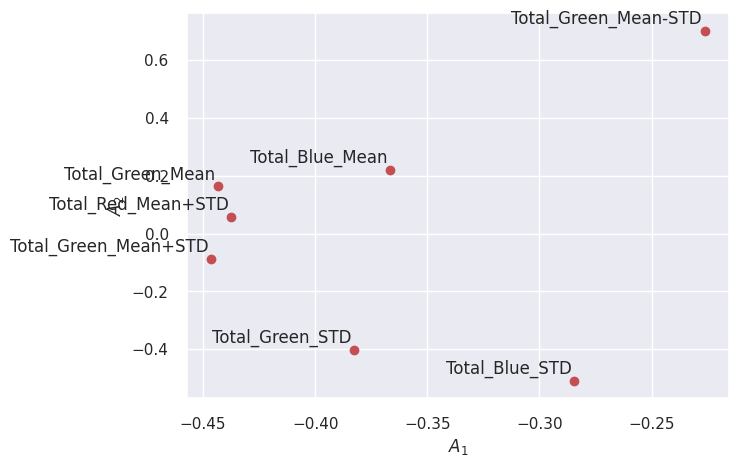

In [22]:
A = pca.components_.T
print (A)
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
#variables = list("Row","Column")
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

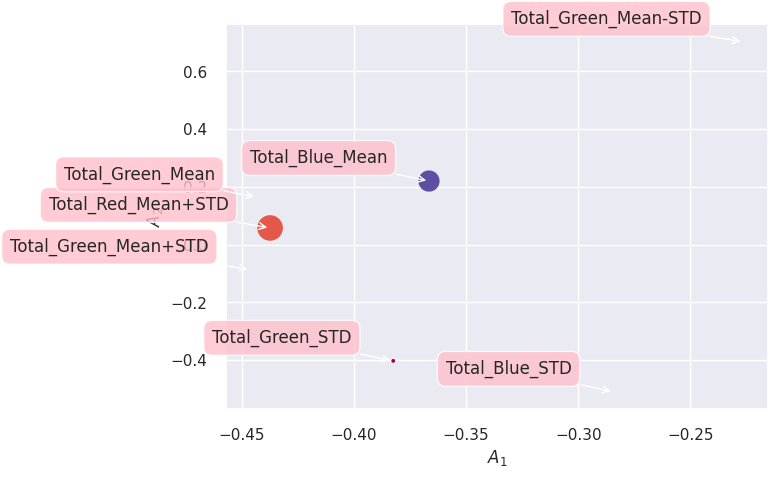

In [24]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-30, 10),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='pink', alpha=0.8),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

[4.72168542e+00 1.49459847e+00 6.16257347e-01 1.17026957e-01
 8.78104637e-02 4.38649184e-05 1.06311621e-05]


Text(0, 0.5, 'Explained variance')

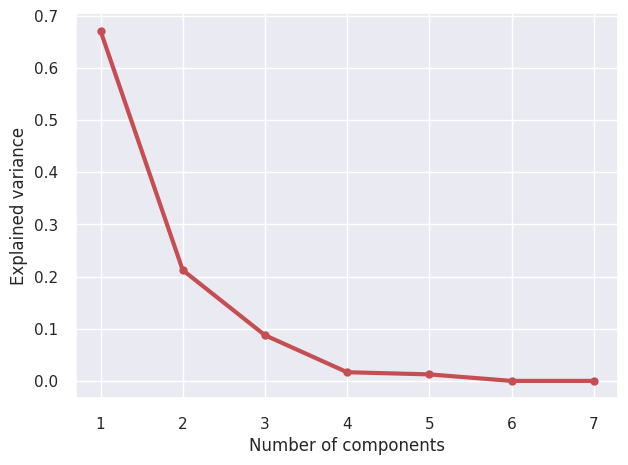

In [25]:
#Eigenvalues
Lambda = pca.explained_variance_
print (Lambda)

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

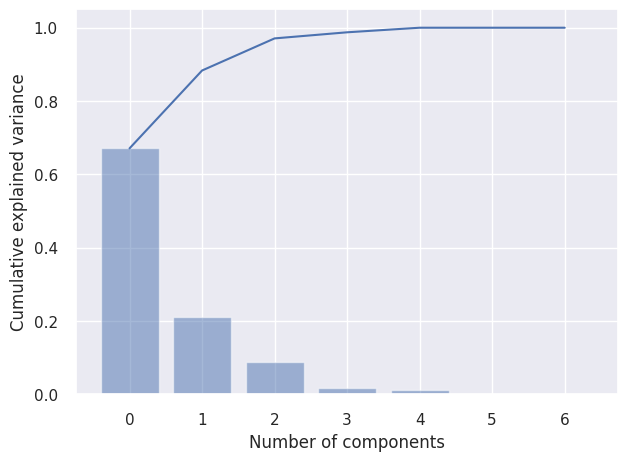

In [26]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

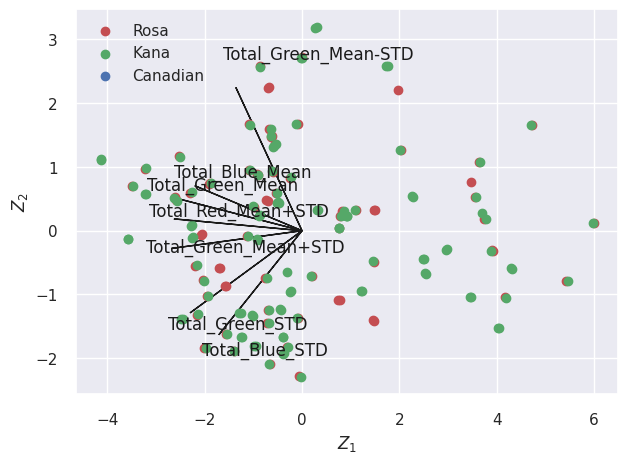

In [29]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [31]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [32]:
out['PC']

,PC1,PC2,PC3
0,-2.600436,0.527317,-0.495956
1,-2.242907,-0.099907,-0.670476
2,-2.131786,-1.310626,-0.010130
3,-2.271394,0.607528,0.068839
4,-1.542648,-1.624010,-0.072038
...,...,...,...
183,-1.387779,-1.878655,-0.580103
184,-3.478457,0.702444,-0.399336
185,-0.435347,-1.238869,-0.468744
186,-0.729065,-0.736922,-0.092166


**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [98.75%] of the variance'}, xlabel='PC1 (67.0% expl.var)', ylabel='PC2 (21.2% expl.var)'>)

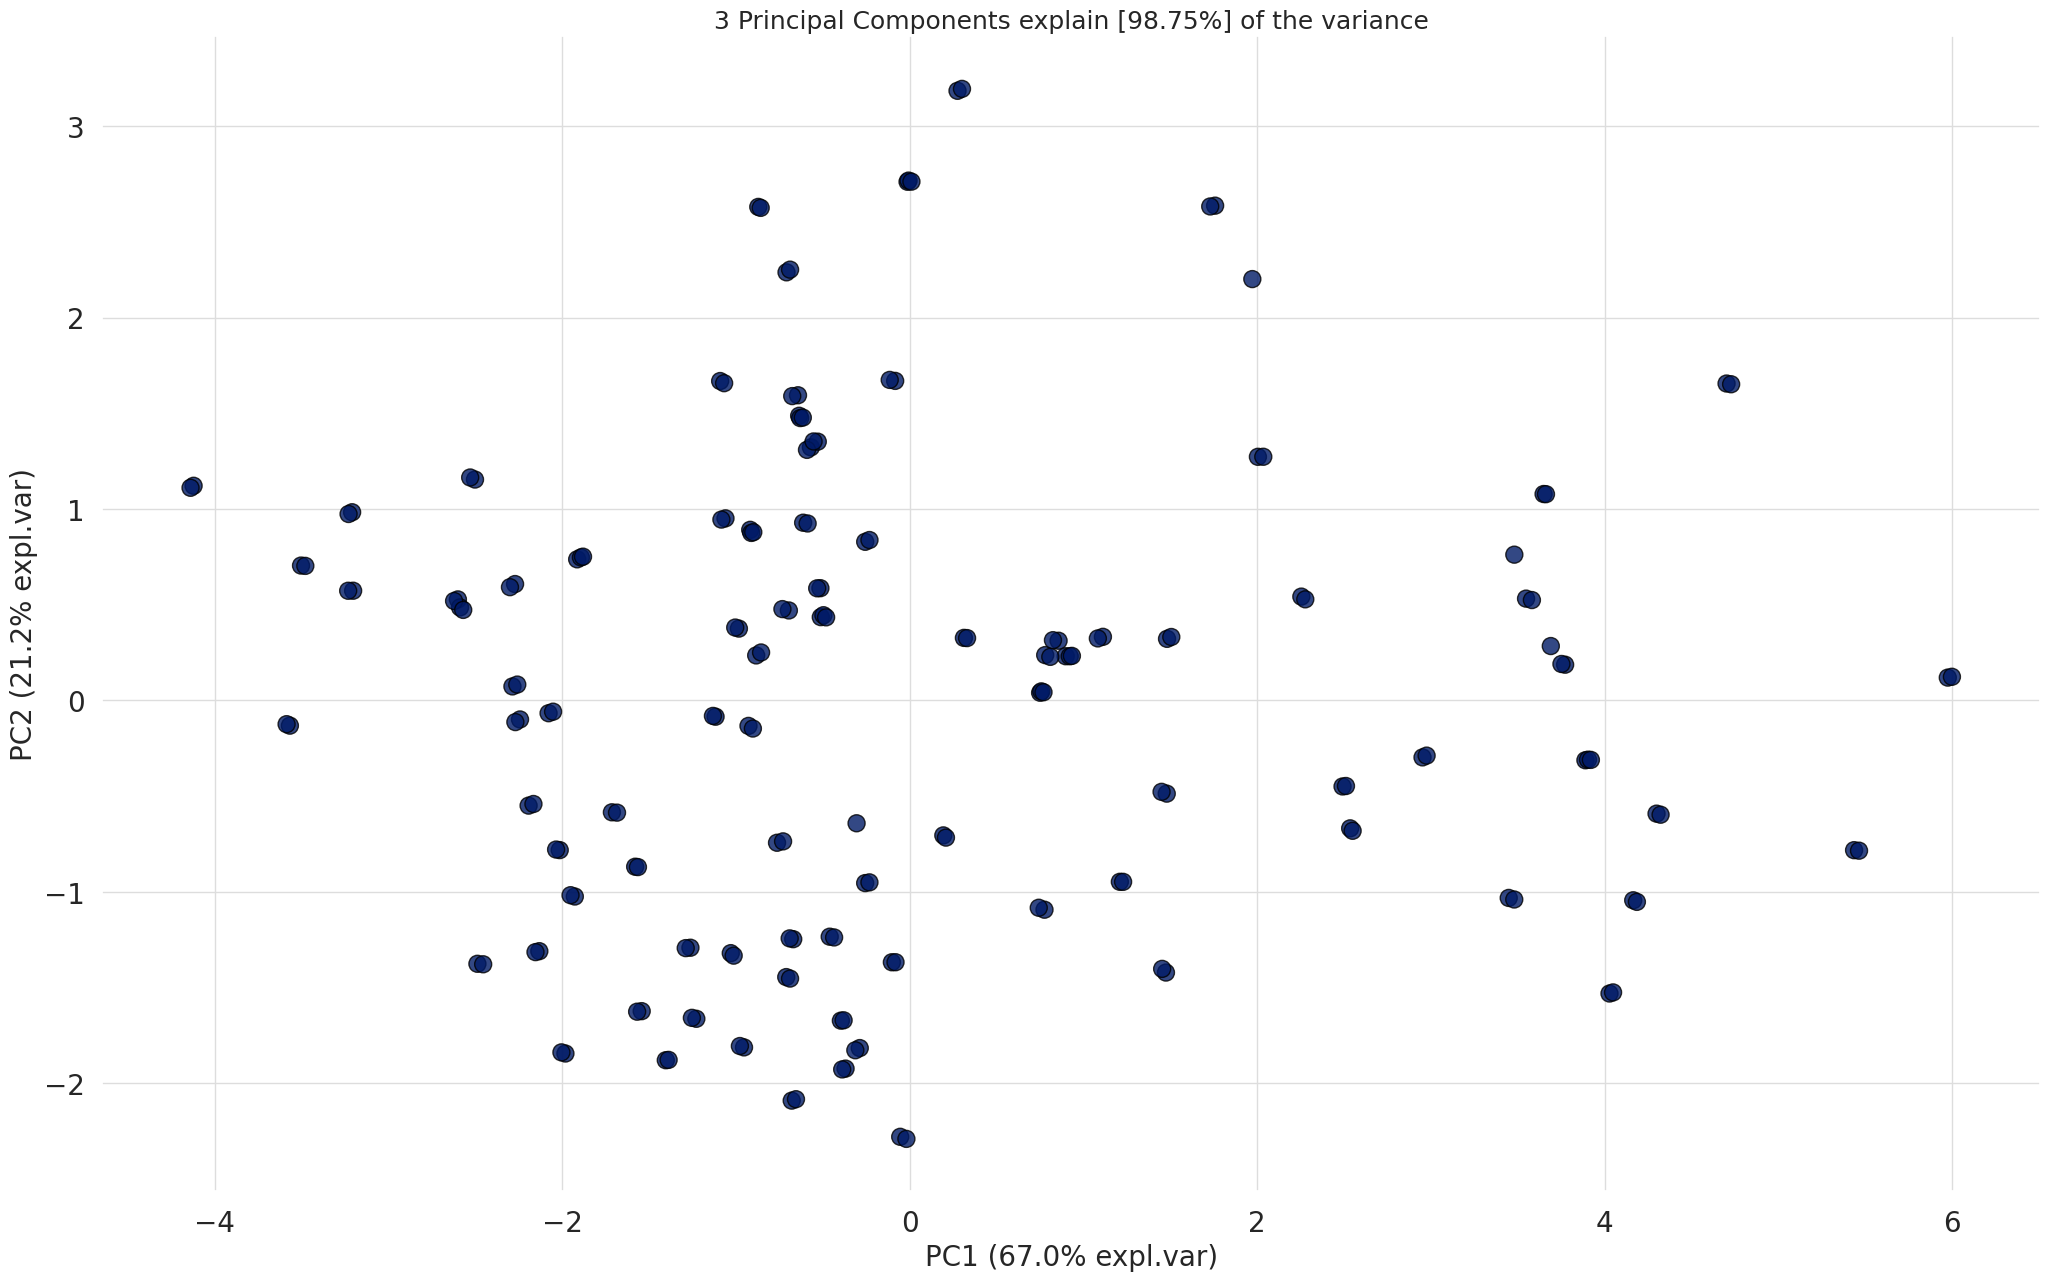

In [33]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [34]:
A = out['loadings'].T

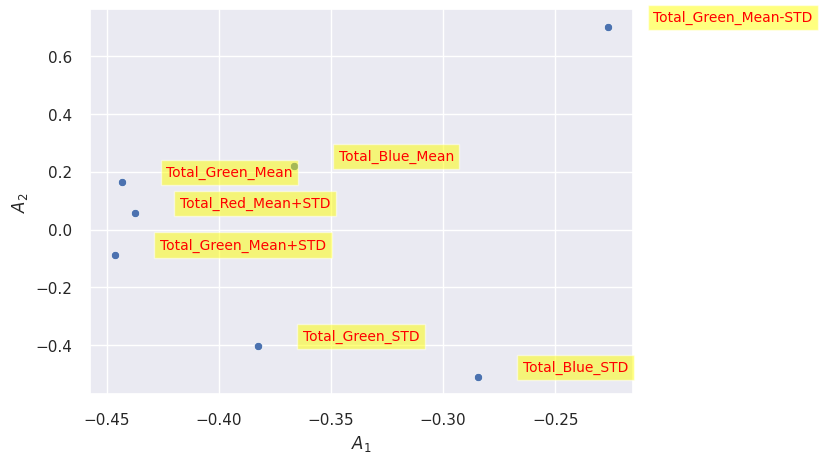

In [35]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

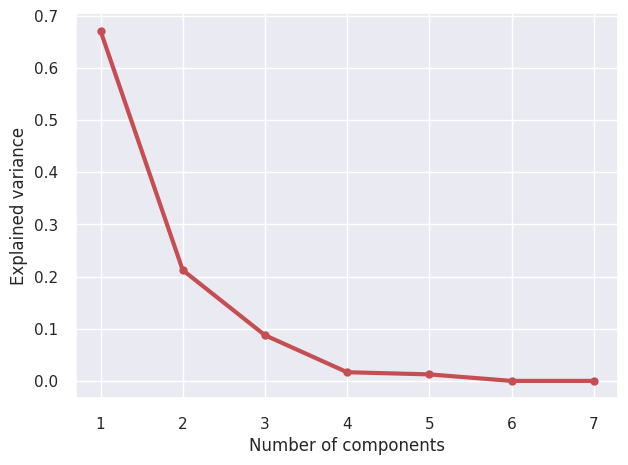

In [36]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

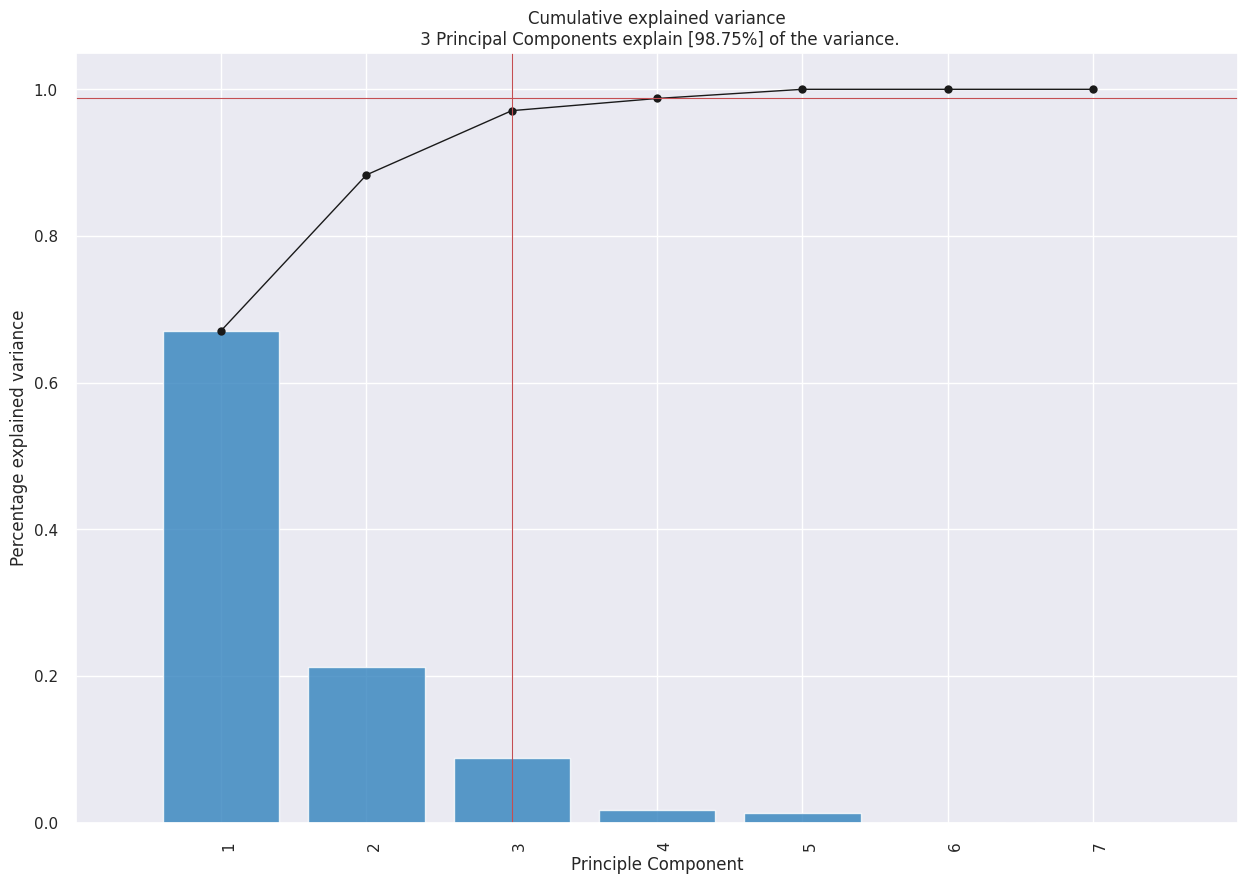

In [37]:
model.plot();

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [98.75%] of the variance'}, xlabel='PC1 (67.0% expl.var)', ylabel='PC2 (21.2% expl.var)'>)

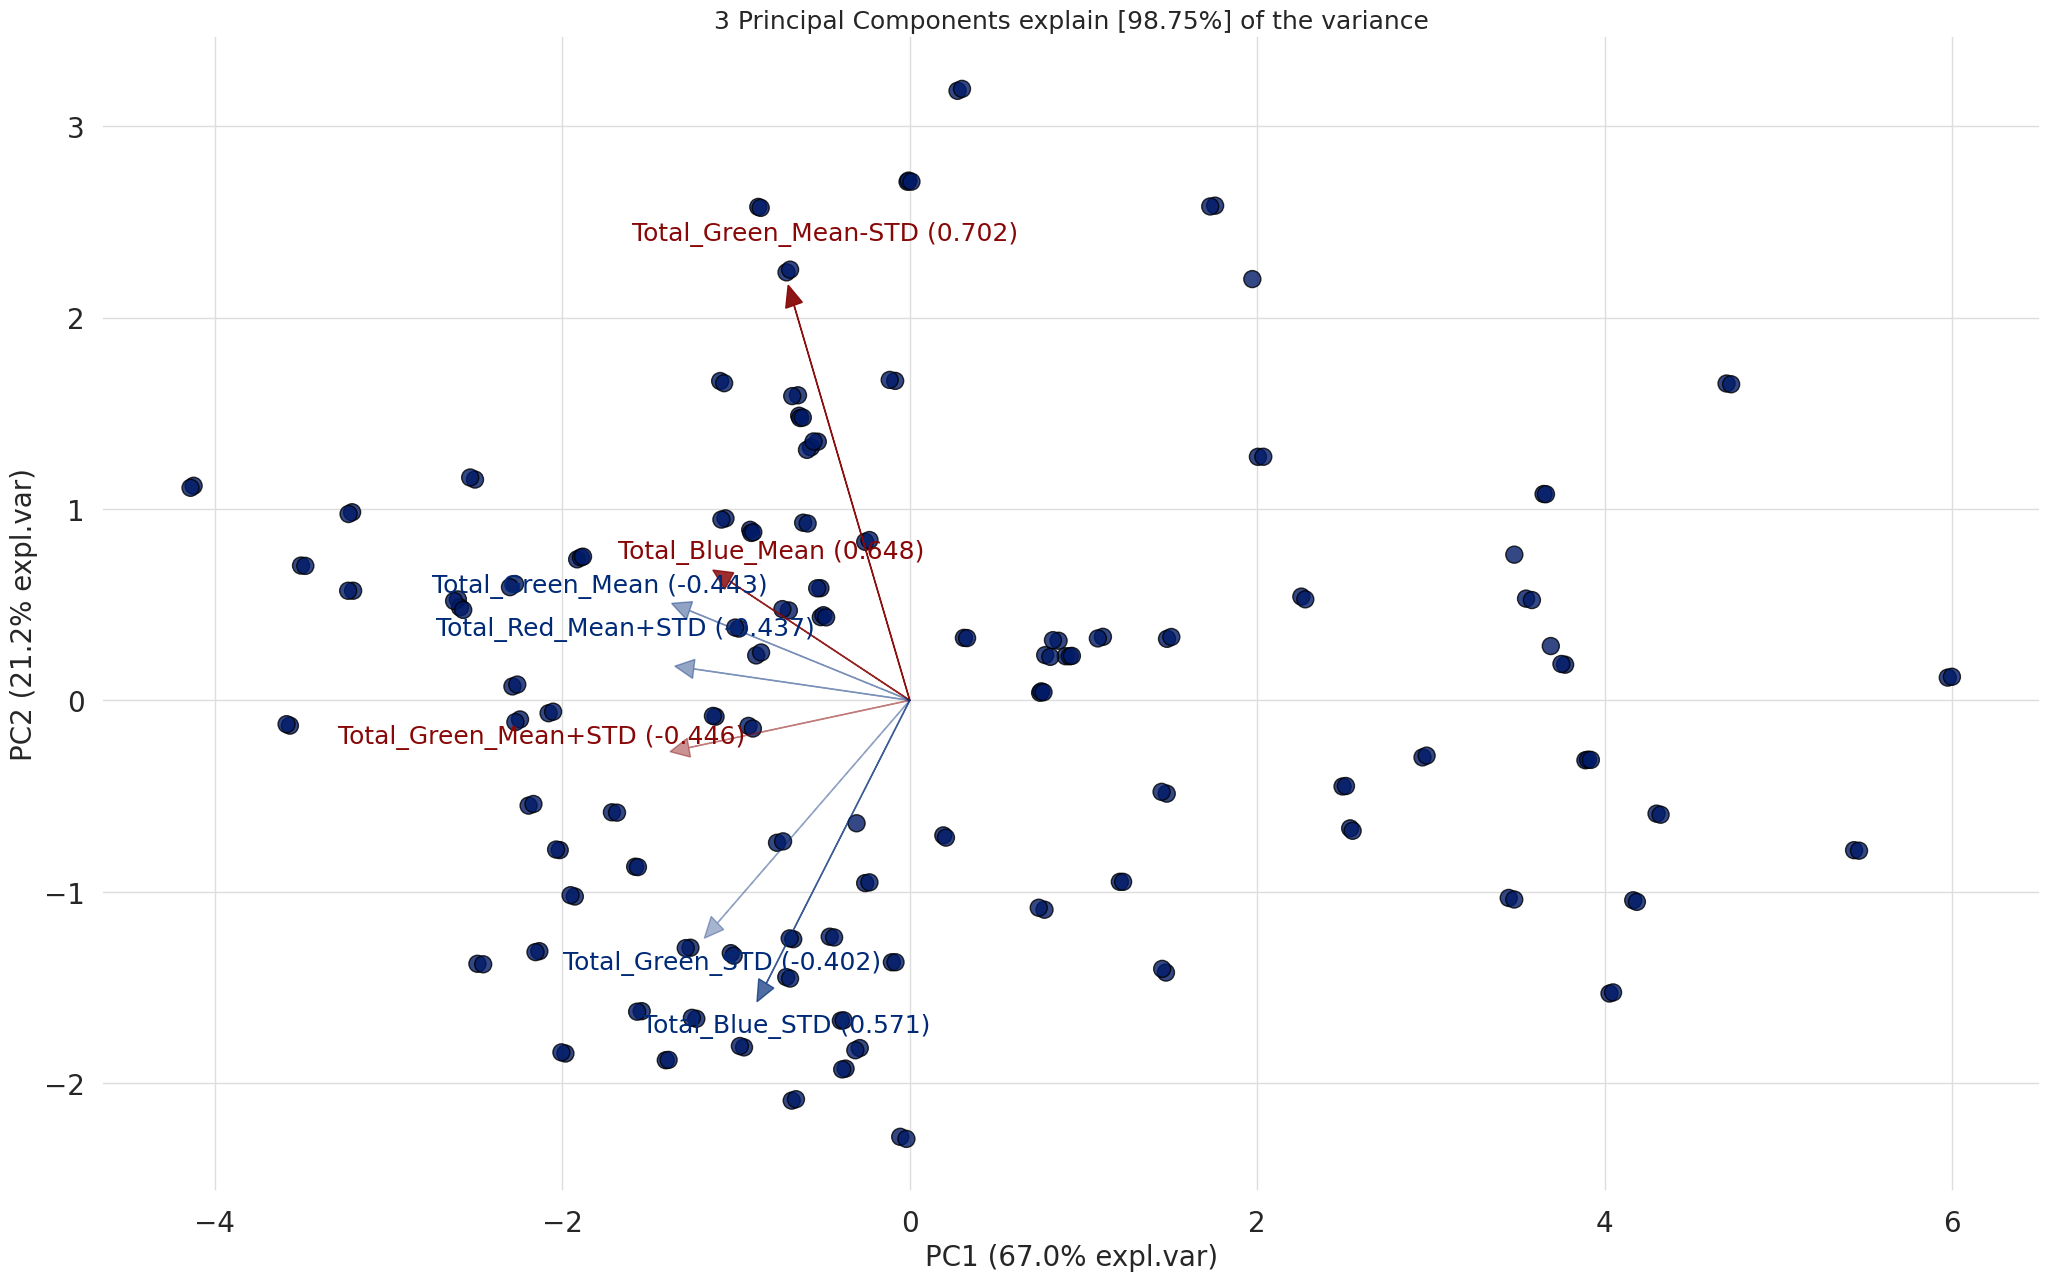

In [38]:
model.biplot(label=False, legend=False)

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook. The enable_colab() function in PyCaret is used to install and configure all the necessary dependencies to use PyCaret in Google Colab.

**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [39]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (169, 8)
Unseen Data For Predictions: (19, 8)


**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [40]:
clf = setup(data=data, target='Categories', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,Categories
2,Target type,Binary
3,Original data shape,"(169, 8)"
4,Transformed data shape,"(169, 8)"
5,Transformed train set shape,"(118, 8)"
6,Transformed test set shape,"(51, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.

**Comparing all Machine Learning Models**

In [41]:
 #show the best model and their statistics
 #best_model = compare_models()
 #from pycaret.classification import *
 best_model = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6189,0.5000,1.0000,0.6189,0.7640,0.0000,0.0000,0.0290
lr,Logistic Regression,0.6098,0.4883,0.8893,0.6307,0.7354,0.0257,0.0167,0.6190
lda,Linear Discriminant Analysis,0.5939,0.5485,0.7750,0.6341,0.6900,0.0623,0.0766,0.0340
ridge,Ridge Classifier,0.5765,0.5565,0.8036,0.6197,0.6949,-0.0163,-0.0281,0.0350
knn,K Neighbors Classifier,0.5758,0.6064,0.6857,0.6754,0.6684,0.0759,0.0885,0.0500
lightgbm,Light Gradient Boosting Machine,0.5674,0.5808,0.7107,0.6471,0.6688,0.0465,0.0470,0.2080
qda,Quadratic Discriminant Analysis,0.5515,0.5252,0.6982,0.6226,0.6502,0.0010,-0.0127,0.0350
et,Extra Trees Classifier,0.5424,0.4916,0.6429,0.6312,0.6261,0.0234,0.0219,0.1570
xgboost,Extreme Gradient Boosting,0.5417,0.5084,0.6429,0.6505,0.6333,0.0159,0.0202,0.0830
gbc,Gradient Boosting Classifier,0.5341,0.4892,0.6732,0.6163,0.6351,-0.0098,-0.0233,0.1320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [42]:
best_model

DummyClassifier(constant=None, random_state=123, strategy='prior')

**Create a Model**

The create_model function is a highly detailed function in PyCaret and is frequently used as the basis for most of PyCaret's features. Its purpose is to train and assess a model using cross-validation, which can be specified with the fold parameter. The function outputs a score grid that displays Accuracy, Recall, Precision, F1, Kappa, and MCC by fold.

For the remainder of this tutorial, we will be working with a particular set of models as examples. Please note that these selections are only intended for demonstration purposes and do not necessarily indicate that they are the most effective or optimal models for this type of data.

* Quadratic Discriminant Analysis ('qda')
* K Neighbors Classifier ('KNN')
* Ridge Classifier ('ridge')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Quadratic Discriminant Analysis**

In [43]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7714,0.7143,0.7143,0.7143,0.3143,0.3143
1,0.4167,0.3429,0.5714,0.5000,0.5333,-0.2353,-0.2390
2,0.5833,0.6286,0.5714,0.6667,0.6154,0.1667,0.1690
3,0.4167,0.4286,0.4286,0.5000,0.4615,-0.1667,-0.1690
4,0.5000,0.4286,0.8571,0.5455,0.6667,-0.1613,-0.2548
5,0.5833,0.7500,0.7500,0.6667,0.7059,0.0000,0.0000
6,0.6667,0.5312,0.8750,0.7000,0.7778,0.1429,0.1581
7,0.5000,0.4062,0.5000,0.6667,0.5714,0.0000,0.0000
8,0.6364,0.6071,0.8571,0.6667,0.7500,0.1200,0.1336


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
#trained model object is stored in the variable 'qda'.
qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model(Quadratic Discriminant Analysis) function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model(Quadratic Discriminant Analysis) function is used. The tune_model(Quadratic Discriminant Analysis) function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Quadratic Discriminant Analysis**

In [45]:
tuned_qda = tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.5714,0.8571,0.5455,0.6667,-0.1613,-0.2548
1,0.4167,0.4286,0.5714,0.5000,0.5333,-0.2353,-0.2390
2,0.6667,0.5143,0.8571,0.6667,0.7500,0.2727,0.2928
3,0.4167,0.4857,0.2857,0.5000,0.3636,-0.1053,-0.1195
4,0.5000,0.3143,0.8571,0.5455,0.6667,-0.1613,-0.2548
5,0.7500,0.7812,1.0000,0.7273,0.8421,0.3077,0.4264
6,0.5000,0.7188,0.6250,0.6250,0.6250,-0.1250,-0.1250
7,0.5000,0.3438,0.5000,0.6667,0.5714,0.0000,0.0000
8,0.6364,0.6071,0.8571,0.6667,0.7500,0.1200,0.1336


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [46]:
#tuned model object is stored in the variable 'tuned_qda'.
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Evaluate Quadratic Discriminant Analysis**

How to analyze model performance using various plots

In [47]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K Neighbors Classifier Model**

In [48]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.5714,0.7143,0.5556,0.6250,-0.0909,-0.0976
1,0.5833,0.5714,0.7143,0.6250,0.6667,0.1176,0.1195
2,0.7500,0.7857,1.0000,0.7000,0.8235,0.4375,0.5292
3,0.7500,0.8000,0.5714,1.0000,0.7273,0.5263,0.5976
4,0.3333,0.2286,0.5714,0.4444,0.5000,-0.4545,-0.4880
5,0.5833,0.6406,0.7500,0.6667,0.7059,0.0000,0.0000
6,0.5833,0.6094,0.6250,0.7143,0.6667,0.1176,0.1195
7,0.5833,0.6250,0.6250,0.7143,0.6667,0.1176,0.1195
8,0.7273,0.8393,0.7143,0.8333,0.7692,0.4407,0.4485


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune K Neighbors Classifier Model**

In [50]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5833,0.6286,1.0000,0.5833,0.7368,0.0000,0.0000
1,0.5833,0.5143,1.0000,0.5833,0.7368,0.0000,0.0000
2,0.5833,0.5429,1.0000,0.5833,0.7368,0.0000,0.0000
3,0.5833,0.5857,1.0000,0.5833,0.7368,0.0000,0.0000
4,0.5833,0.4000,1.0000,0.5833,0.7368,0.0000,0.0000
5,0.6667,0.5000,1.0000,0.6667,0.8000,0.0000,0.0000
6,0.6667,0.5625,1.0000,0.6667,0.8000,0.0000,0.0000
7,0.6667,0.4531,1.0000,0.6667,0.8000,0.0000,0.0000
8,0.6364,0.3214,1.0000,0.6364,0.7778,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate K Neighbors Classifier Model**

In [52]:
#tuned model object is stored in the variable 'tuned_knn'.
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')

In [53]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Ridge Classifier Model**

In [54]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7429,0.8571,0.6667,0.7500,0.2727,0.2928
1,0.4167,0.2286,0.7143,0.5000,0.5882,-0.3125,-0.3780
2,0.5833,0.7143,0.5714,0.6667,0.6154,0.1667,0.1690
3,0.5000,0.5714,0.5714,0.5714,0.5714,-0.0286,-0.0286
4,0.5000,0.4286,0.7143,0.5556,0.6250,-0.0909,-0.0976
5,0.5833,0.7500,0.8750,0.6364,0.7368,-0.1538,-0.2132
6,0.5833,0.6562,0.8750,0.6364,0.7368,-0.1538,-0.2132
7,0.7500,0.4375,1.0000,0.7273,0.8421,0.3077,0.4264
8,0.5455,0.4286,0.8571,0.6000,0.7059,-0.1702,-0.2390


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Ridge Classifier Model**

In [55]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5833,0.6571,0.8571,0.6000,0.7059,0.0625,0.0756
1,0.5000,0.1714,0.8571,0.5455,0.6667,-0.1613,-0.2548
2,0.8333,0.6571,1.0000,0.7778,0.8750,0.6364,0.6831
3,0.5000,0.4000,0.5714,0.5714,0.5714,-0.0286,-0.0286
4,0.5833,0.4000,1.0000,0.5833,0.7368,0.0000,0.0000
5,0.6667,0.8125,1.0000,0.6667,0.8000,0.0000,0.0000
6,0.5833,0.6562,0.8750,0.6364,0.7368,-0.1538,-0.2132
7,0.6667,0.2188,1.0000,0.6667,0.8000,0.0000,0.0000
8,0.5455,0.2500,0.8571,0.6000,0.7059,-0.1702,-0.2390


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Ridge Classifier Model**

In [56]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [58]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5833,0.5000,1.0000,0.5833,0.7368,0.0000,0.0000
1,0.5833,0.5000,1.0000,0.5833,0.7368,0.0000,0.0000
2,0.5833,0.5000,1.0000,0.5833,0.7368,0.0000,0.0000
3,0.5833,0.5000,1.0000,0.5833,0.7368,0.0000,0.0000
4,0.5833,0.5000,1.0000,0.5833,0.7368,0.0000,0.0000
5,0.6667,0.5000,1.0000,0.6667,0.8000,0.0000,0.0000
6,0.6667,0.5000,1.0000,0.6667,0.8000,0.0000,0.0000
7,0.6667,0.5000,1.0000,0.6667,0.8000,0.0000,0.0000
8,0.6364,0.5000,1.0000,0.6364,0.7778,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [59]:
tuned_best_model

DummyClassifier(constant=None, random_state=123, strategy='prior')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [60]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [61]:
clf_pca = setup(data=df, target='Categories', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,Categories
2,Target type,Binary
3,Original data shape,"(188, 8)"
4,Transformed data shape,"(188, 4)"
5,Transformed train set shape,"(131, 4)"
6,Transformed test set shape,"(57, 4)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


**Create Linear Discriminant Analysis Analysis**

In [62]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.5111,1.0000,0.6429,0.7826,0.0000,0.0000
1,0.5385,0.3500,0.8750,0.5833,0.7000,-0.1471,-0.2282
2,0.6154,0.5750,1.0000,0.6154,0.7619,0.0000,0.0000
3,0.6154,0.6750,1.0000,0.6154,0.7619,0.0000,0.0000
4,0.5385,0.3750,0.8750,0.5833,0.7000,-0.1471,-0.2282
5,0.6154,0.6250,1.0000,0.6154,0.7619,0.0000,0.0000
6,0.6154,0.6250,1.0000,0.6154,0.7619,0.0000,0.0000
7,0.5385,0.2750,0.8750,0.5833,0.7000,-0.1471,-0.2282
8,0.6923,0.4750,1.0000,0.6667,0.8000,0.2353,0.3651


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Linear Discriminant Analysis Model**

In [63]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.4667,1.0000,0.6429,0.7826,0.0000,0.0000
1,0.6154,0.4000,1.0000,0.6154,0.7619,0.0000,0.0000
2,0.6154,0.6000,1.0000,0.6154,0.7619,0.0000,0.0000
3,0.6154,0.5500,1.0000,0.6154,0.7619,0.0000,0.0000
4,0.6154,0.3500,1.0000,0.6154,0.7619,0.0000,0.0000
5,0.6154,0.6250,1.0000,0.6154,0.7619,0.0000,0.0000
6,0.6154,0.4250,1.0000,0.6154,0.7619,0.0000,0.0000
7,0.5385,0.2250,0.8750,0.5833,0.7000,-0.1471,-0.2282
8,0.6154,0.4250,1.0000,0.6154,0.7619,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Linear Discriminant Analysis Model**

In [64]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Quadratic Discriminant Analysis**

In [65]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.4889,1.0000,0.6429,0.7826,0.0000,0.0000
1,0.5385,0.2750,0.8750,0.5833,0.7000,-0.1471,-0.2282
2,0.6154,0.6000,1.0000,0.6154,0.7619,0.0000,0.0000
3,0.6154,0.4500,0.8750,0.6364,0.7368,0.0845,0.1011
4,0.6154,0.5250,0.8750,0.6364,0.7368,0.0845,0.1011
5,0.6154,0.5250,1.0000,0.6154,0.7619,0.0000,0.0000
6,0.7692,0.6000,1.0000,0.7273,0.8421,0.4507,0.5394
7,0.4615,0.4500,0.7500,0.5455,0.6316,-0.2817,-0.3371
8,0.6923,0.4250,1.0000,0.6667,0.8000,0.2353,0.3651


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Quadratic Discriminant Analysis Model**

In [66]:
tuned_qda = tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.4222,1.0000,0.6429,0.7826,0.0000,0.0000
1,0.5385,0.3750,0.8750,0.5833,0.7000,-0.1471,-0.2282
2,0.6154,0.5250,1.0000,0.6154,0.7619,0.0000,0.0000
3,0.6154,0.4250,0.8750,0.6364,0.7368,0.0845,0.1011
4,0.6154,0.4750,0.8750,0.6364,0.7368,0.0845,0.1011
5,0.6923,0.5500,1.0000,0.6667,0.8000,0.2353,0.3651
6,0.6923,0.6500,1.0000,0.6667,0.8000,0.2353,0.3651
7,0.5385,0.4000,0.8750,0.5833,0.7000,-0.1471,-0.2282
8,0.6923,0.4250,1.0000,0.6667,0.8000,0.2353,0.3651


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Quadratic Discriminant Analysis Model**

In [67]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Logistic Regression Model**

In [68]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.5111,1.0000,0.6429,0.7826,0.0000,0.0000
1,0.5385,0.3500,0.8750,0.5833,0.7000,-0.1471,-0.2282
2,0.6154,0.5750,1.0000,0.6154,0.7619,0.0000,0.0000
3,0.6154,0.6500,1.0000,0.6154,0.7619,0.0000,0.0000
4,0.5385,0.3750,0.8750,0.5833,0.7000,-0.1471,-0.2282
5,0.6154,0.6250,1.0000,0.6154,0.7619,0.0000,0.0000
6,0.6154,0.6250,1.0000,0.6154,0.7619,0.0000,0.0000
7,0.5385,0.2750,0.8750,0.5833,0.7000,-0.1471,-0.2282
8,0.6923,0.4750,1.0000,0.6667,0.8000,0.2353,0.3651


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Logistic Regression Model**

In [69]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.4889,1.0000,0.6429,0.7826,0.0000,0.0000
1,0.6154,0.3750,1.0000,0.6154,0.7619,0.0000,0.0000
2,0.6154,0.6000,1.0000,0.6154,0.7619,0.0000,0.0000
3,0.6154,0.5750,1.0000,0.6154,0.7619,0.0000,0.0000
4,0.6154,0.3750,1.0000,0.6154,0.7619,0.0000,0.0000
5,0.6154,0.6750,1.0000,0.6154,0.7619,0.0000,0.0000
6,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
7,0.5385,0.2500,0.8750,0.5833,0.7000,-0.1471,-0.2282
8,0.6154,0.4250,1.0000,0.6154,0.7619,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Logistic Regression Model**

In [70]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [71]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6181,0.5000,1.0000,0.6181,0.7640,0.0000,0.0000,0.0440
qda,Quadratic Discriminant Analysis,0.6104,0.4514,0.9250,0.6252,0.7454,0.0279,0.0313,0.0520
lr,Logistic Regression,0.6027,0.4636,0.9625,0.6136,0.7492,-0.0206,-0.0320,0.0890
ridge,Ridge Classifier,0.6027,0.4661,0.9625,0.6136,0.7492,-0.0206,-0.0320,0.0500
lda,Linear Discriminant Analysis,0.5951,0.4661,0.9500,0.6104,0.7430,-0.0353,-0.0548,0.0740
nb,Naive Bayes,0.5879,0.3900,0.9389,0.6071,0.7368,-0.0476,-0.0635,0.0520
knn,K Neighbors Classifier,0.5484,0.4787,0.7625,0.6041,0.6710,-0.0367,-0.0276,0.1120
lightgbm,Light Gradient Boosting Machine,0.5478,0.5397,0.7000,0.6185,0.6520,0.0019,0.0082,0.2570
xgboost,Extreme Gradient Boosting,0.5407,0.4783,0.6889,0.6146,0.6472,-0.0114,-0.0097,0.0730
svm,SVM - Linear Kernel,0.5044,0.4403,0.5944,0.5861,0.5770,-0.0344,-0.0295,0.0520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [72]:
best_model_pca

DummyClassifier(constant=None, random_state=123, strategy='prior')

**Tune the Best Model**

In [73]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.5000,1.0000,0.6429,0.7826,0.0000,0.0000
1,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
2,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
3,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
4,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
5,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
6,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
7,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
8,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [75]:
tuned_best_model_pca

DummyClassifier(constant=None, random_state=123, strategy='prior')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [76]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

SHAP is a Python library for model interpretation and feature importance analysis, and it provides a variety of tools for explaining the output of machine learning models. The library is based on the Shapley value, a concept from cooperative game theory that assigns a value to each player in a game based on their contribution to the overall outcome.

In [77]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.8444,0.8889,0.7273,0.8000,0.3171,0.3373
1,0.3077,0.2375,0.5000,0.4444,0.4706,-0.5195,-0.5270
2,0.6154,0.6750,0.8750,0.6364,0.7368,0.0845,0.1011
3,0.6154,0.5500,0.7500,0.6667,0.7059,0.1558,0.1581
4,0.4615,0.4000,0.6250,0.5556,0.5882,-0.1818,-0.1845
5,0.3077,0.2250,0.5000,0.4444,0.4706,-0.5195,-0.5270
6,0.3846,0.3000,0.3750,0.5000,0.4286,-0.2093,-0.2196
7,0.3846,0.2500,0.5000,0.5000,0.5000,-0.3000,-0.3000
8,0.7692,0.7875,0.8750,0.7778,0.8235,0.4935,0.5007


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [78]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.5000,1.0000,0.6429,0.7826,0.0000,0.0000
1,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
2,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
3,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
4,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
5,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
6,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
7,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000
8,0.6154,0.5000,1.0000,0.6154,0.7619,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

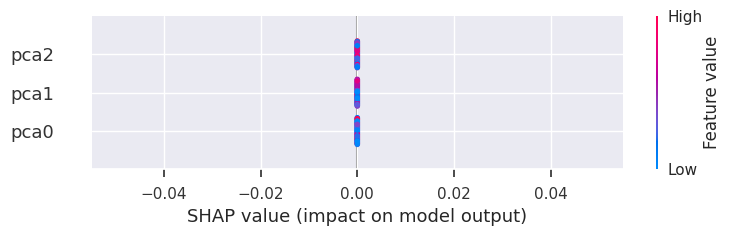

In [79]:
interpret_model(tuned_rf_pca, plot='summary')

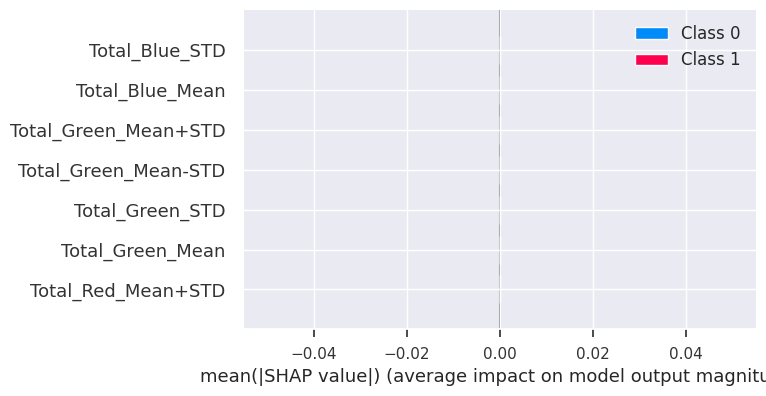

In [80]:
explainer = shap.TreeExplainer(tuned_rf_pca)
X = df.drop('Categories', axis=1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [81]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [82]:
interpret_model(tuned_rf_pca, plot='reason')